In [29]:
# Pablo Exposito Matilla al415550@uji.es

In [30]:
!pip install pomegranate==0.13.0
!apt install libgraphviz-dev
!pip install pygraphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
from pomegranate import *
import matplotlib.pyplot as plt
import seaborn
import numpy
import pygraphviz
import numpy as np
import matplotlib.pylab as plt
import math

seaborn.set_style('whitegrid')
numpy.random.seed(0)
numpy.set_printoptions(suppress=True)

***Student network***

Now, implement in pomegranate the Student bayesian net- work. For convenience, consider replacing the names of the variables or their values with meaningful ones (e.g. ’easy- Course’ and ’hardCourse’ for the course difficulty). Notice that, although having the variable name as part of the value name is redundant, it can be helpful when we inspect the output of our queries.


In [32]:
dificultad = DiscreteDistribution({'dificultad-alta': 0.4,'dificultad-baja': 0.6})
print("difivultad", dificultad)
print("parameters:",dificultad.parameters)
print("P(dificultad-alta)=",dificultad.parameters[0]["dificultad-alta"])

inteligencia = DiscreteDistribution({'inteligencia-alta': 0.3,'inteligencia-baja': 0.7})
print("inteligencia", inteligencia)
print("parameters:",inteligencia.parameters)
print("P(inteligencia-alta)=",inteligencia.parameters[0]["inteligencia-alta"])

difivultad {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "dificultad-alta" :0.4,
            "dificultad-baja" :0.6
        }
    ],
    "frozen" :false
}
parameters: [{'dificultad-alta': 0.4, 'dificultad-baja': 0.6}]
P(dificultad-alta)= 0.4
inteligencia {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "inteligencia-alta" :0.3,
            "inteligencia-baja" :0.7
        }
    ],
    "frozen" :false
}
parameters: [{'inteligencia-alta': 0.3, 'inteligencia-baja': 0.7}]
P(inteligencia-alta)= 0.3


In [33]:
nota = ConditionalProbabilityTable(
        # Dificultad        Inteligencia          Notas       P(Notas|Dificultad, Inteligencia)
    [["dificultad-baja", "inteligencia-baja", "nota-excelente", 0.3],
     ["dificultad-baja", "inteligencia-baja", "nota-buena", 0.4],
     ["dificultad-baja", "inteligencia-baja", "nota-regular", 0.3],
     
     ["dificultad-alta", "inteligencia-baja", "nota-excelente", 0.05],
     ["dificultad-alta", "inteligencia-baja", "nota-buena", 0.25],
     ["dificultad-alta", "inteligencia-baja", "nota-regular", 0.7],

     ["dificultad-baja", "inteligencia-alta", "nota-excelente", 0.9],
     ["dificultad-baja", "inteligencia-alta", "nota-buena", 0.08],
     ["dificultad-baja", "inteligencia-alta", "nota-regular", 0.02],

     ["dificultad-alta", "inteligencia-alta", "nota-excelente", 0.5],
     ["dificultad-alta", "inteligencia-alta", "nota-buena", 0.3],
     ["dificultad-alta", "inteligencia-alta", "nota-regular", 0.2]
    ],
     [dificultad,inteligencia])
    
print(nota, "\n\n")

SAT = ConditionalProbabilityTable(
        #Inteligencia       SAT       P(SAT|Inteligencia)
    [["inteligencia-baja", "SAT-alto", 0.05],
     ["inteligencia-baja", "SAT-bajo", 0.95],
     
     ["inteligencia-alta", "SAT-alto", 0.8],
     ["inteligencia-alta", "SAT-bajo", 0.2]
    ],
     [inteligencia])
print(SAT, "\n\n")


dificultad-baja	inteligencia-baja	nota-excelente	0.3
dificultad-baja	inteligencia-baja	nota-buena	0.4
dificultad-baja	inteligencia-baja	nota-regular	0.3
dificultad-alta	inteligencia-baja	nota-excelente	0.05000000000000001
dificultad-alta	inteligencia-baja	nota-buena	0.25
dificultad-alta	inteligencia-baja	nota-regular	0.7
dificultad-baja	inteligencia-alta	nota-excelente	0.9
dificultad-baja	inteligencia-alta	nota-buena	0.07999999999999999
dificultad-baja	inteligencia-alta	nota-regular	0.02
dificultad-alta	inteligencia-alta	nota-excelente	0.5
dificultad-alta	inteligencia-alta	nota-buena	0.3
dificultad-alta	inteligencia-alta	nota-regular	0.2 


inteligencia-baja	SAT-alto	0.05000000000000001
inteligencia-baja	SAT-bajo	0.95
inteligencia-alta	SAT-alto	0.8
inteligencia-alta	SAT-bajo	0.2 




In [34]:
recomendacion = ConditionalProbabilityTable(
     #    Notas           Recomendacion  P(Recomendacion|Notas)
    [["nota-excelente", "recomendacion-alta", 0.9],
     ["nota-excelente", "recomendacion-baja", 0.1],

     ["nota-buena", "recomendacion-alta", 0.4],
     ["nota-buena", "recomendacion-baja", 0.6],

     ["nota-regular", "recomendacion-alta", 0.01],
     ["nota-regular", "recomendacion-baja", 0.99]
    ],
     [nota])
print(recomendacion, "\n\n")


nota-excelente	recomendacion-alta	0.9
nota-excelente	recomendacion-baja	0.10000000000000002
nota-buena	recomendacion-alta	0.4
nota-buena	recomendacion-baja	0.6
nota-regular	recomendacion-alta	0.010000000000000004
nota-regular	recomendacion-baja	0.99 




In [35]:
# State objects hold both the distribution, and a high level name
s_dificultad = State(dificultad,name='dificultad')
s_inteligencia = State(inteligencia,name='inteligencia')
s_nota = State(nota,name='nota')
s_SAT = State(SAT,name='SAT')
s_recomendacion = State(recomendacion,name='recomendacion')

In [36]:
# Bayesian network
model2 = BayesianNetwork("Student network")
print(model2.name)

Student network


In [37]:
model2.add_states(s_inteligencia, s_dificultad, s_nota, s_SAT, s_recomendacion) # order is unimportant now, but *should* be considered later
print(model2) # we can explore and check the output

Student network:{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "dtype" : "str",
        "name" : "DiscreteDistribution",
        "parameters" : [
            {
                "inteligencia-alta" : 0.3,
                "inteligencia-baja" : 0.7
            }
        ],
        "frozen" : false
    },
    "name" : "inteligencia",
    "weight" : 1.0
}{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "dtype" : "str",
        "name" : "DiscreteDistribution",
        "parameters" : [
            {
                "dificultad-alta" : 0.4,
                "dificultad-baja" : 0.6
            }
        ],
        "frozen" : false
    },
    "name" : "dificultad",
    "weight" : 1.0
}{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "name" : "ConditionalProbabilityTable",
        "table" : [
            [
                "dificultad-baja",
                "inteligencia-baja"

In [38]:
# add_edge(parent,child) parent -> child
model2.add_edge(s_inteligencia,s_SAT) 
model2.add_edge(s_inteligencia,s_nota)
model2.add_edge(s_dificultad,s_nota)
model2.add_edge(s_nota,s_recomendacion)

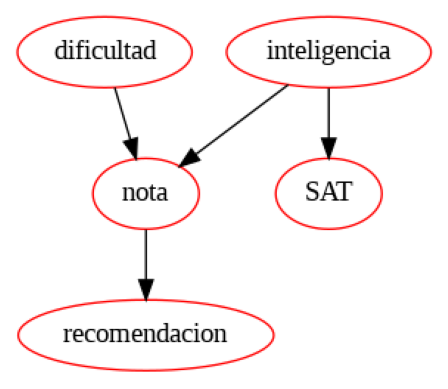

In [39]:
# draw network (graph)

model2.plot()

#print(model)

In [40]:
# Prepare for internal computations (factor graphs in BN)
model2.bake()

SN1. Compute different queries of interest, such as the ones seen in class: P(I = 1,D = 0,G = 1,L = 0), P(L = 1), P(L = 1|I = 0), etc.

In [41]:
X = [[ "inteligencia-alta", "dificultad-baja", "nota-buena", None, "recomendacion-baja"]]
p = model2.probability(X) #  matrix of posterior probabilities 
print("P(I = 1,D = 0,G = 1,L = 0) = ", p)

P(I = 1,D = 0,G = 1,L = 0) =  0.008640000000000002


<ipython-input-41-b8984a0e67e1>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  p = model2.probability(X) #  matrix of posterior probabilities


In [42]:
X = [[ None, None, None,"SAT-alto", None]]
p = model2.probability(X) #  matrix of posterior probabilities 
print("P(L = 1) = ", p)

P(L = 1) =  1.0


<ipython-input-42-6c470f04c78f>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  p = model2.probability(X) #  matrix of posterior probabilities


In [43]:
p = model2.predict_proba({"inteligencia": "inteligencia-baja"})
print("P(L = 1|I = 0) = ", p[4].parameters[0]['recomendacion-alta'])

P(L = 1|I = 0) =  0.32060000000000016


SN2. Compute the probability of one student being very smart given some evidence. Check and plot how this probability increases with more variables being observed with favourable values: first without no evidence at all, then only with good recommendation letter, then also with good score at SAT, etc.

<ipython-input-44-e1b57daaccdd>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  p = model2.predict_proba(X) #  matrix of posterior probabilities
<ipython-input-44-e1b57daaccdd>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  p = model2.predict_proba(X) #  matrix of posterior probabilities
<ipython-input-44-e1b57daaccdd>:10: DeprecationW

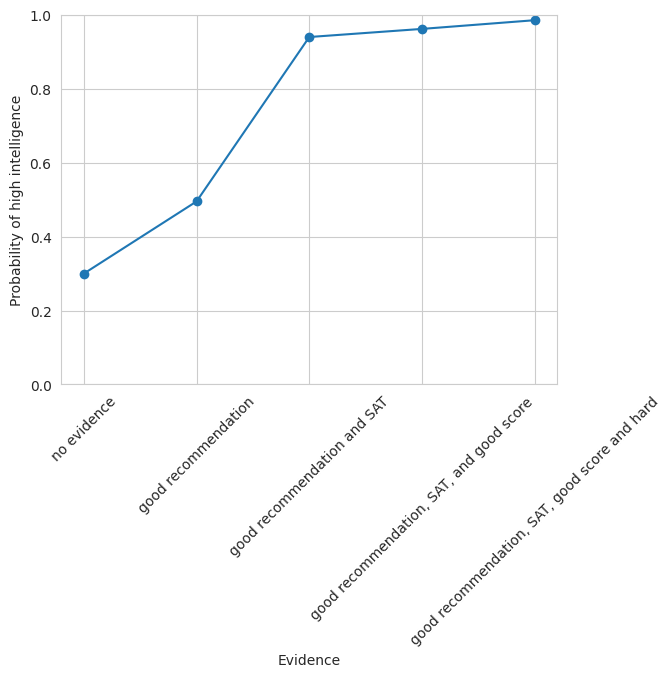

In [44]:
X = [[ None, None, None, None, None]]
p = model2.predict_proba(X) #  matrix of posterior probabilities 
p1 = p[0][0].parameters[0]["inteligencia-alta"]

X = [[ None, None, None, None, "recomendacion-alta"]]
p = model2.predict_proba(X) #  matrix of posterior probabilities 
p2 = p[0][0].parameters[0]["inteligencia-alta"]

X = [[ None, None, None, "SAT-alto", "recomendacion-alta"]]
p = model2.predict_proba(X) #  matrix of posterior probabilities 
p3 = p[0][0].parameters[0]["inteligencia-alta"]

X = [[ None, None, "nota-excelente", "SAT-alto", "recomendacion-alta"]]
p = model2.predict_proba(X) #  matrix of posterior probabilities 
p4 = p[0][0].parameters[0]["inteligencia-alta"]

X = [[ None, "dificultad-alta", "nota-excelente", "SAT-alto", "recomendacion-alta"]]
p = model2.predict_proba(X) #  matrix of posterior probabilities 
p5 = p[0][0].parameters[0]["inteligencia-alta"]

probs = [p1, p2, p3, p4, p5]
labels = ['no evidence', 'good recommendation', 'good recommendation and SAT', 'good recommendation, SAT, and good score', 'good recommendation, SAT, good score and hard']

plt.plot(np.arange(len(probs)), probs, '-o')
plt.xticks(np.arange(len(probs)), labels, rotation=45)
plt.xlabel('Evidence')
plt.ylabel('Probability of high intelligence')
plt.ylim([0, 1])
plt.show()

SN3. If a student got good score at SAT and good recommendation letter but poor grade in a course, what is a better explanation, according to this model: that the student is not very intelligent, or that the course was difficult?

In [45]:
X = [[ None, None, "nota-regular", "SAT-alto", "recomendacion-alta"]]
p = model2.predict_proba(X) #  matrix of posterior probabilities 
print("P(inteligencia-baja| nota-regular, SAT-alto, recomendacion-alta) = ", p[0][0].parameters[0]["inteligencia-baja"])
print("P(dificultad-alta| nota-regular, SAT-alto, recomendacion-alta) = ", p[0][1].parameters[0]["dificultad-alta"])
# La mejor explicación es que la dificultad es alta

P(inteligencia-baja| nota-regular, SAT-alto, recomendacion-alta) =  0.4216867469879523
P(dificultad-alta| nota-regular, SAT-alto, recomendacion-alta) =  0.759559979046621


<ipython-input-45-752a76a353ea>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  p = model2.predict_proba(X) #  matrix of posterior probabilities


SN4. Find out what are the most probable values for I, L and G if we know that the course was very difficult (D = 2).

In [46]:
X = [[ None, "dificultad-alta", None, None, None]]
p = model2.predict_proba(X) #  matrix of posterior probabilities
print("P(inteligencia) = ", p[0][0].parameters[0]) # inteligencia-baja
print("P(recomendacion) = ", p[0][4].parameters[0]) # recomendacion-baja
print("P(notas) = ", p[0][2].parameters[0]) # nota regular (baja)

P(inteligencia) =  {'inteligencia-alta': 0.3000000000000005, 'inteligencia-baja': 0.6999999999999996}
P(recomendacion) =  {'recomendacion-baja': 0.7219999999999996, 'recomendacion-alta': 0.27800000000000047}
P(notas) =  {'nota-regular': 0.5499999999999996, 'nota-excelente': 0.1850000000000004, 'nota-buena': 0.26500000000000007}


<ipython-input-46-7a04a601644f>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  p = model2.predict_proba(X) #  matrix of posterior probabilities


SN5. ComputeP(I=0,G=1|L=2,S=0).

In [47]:
# P(I=0,G=1|L=2,S=0) = P(I=0,G=1,L=2,S=0) / P(L=2,S=0)
X = [[ "inteligencia-baja", None, "nota-regular", "SAT-alto", "recomendacion-baja"]]
p1 = model2.probability(X) 

X = [[ None, None, None, "SAT-alto", "recomendacion-baja"]]
p2 = model2.probability(X) 
print("P(I=0,G=1|L=2,S=0) = ", p1/p2)

P(I=0,G=1|L=2,S=0) =  0.03465


<ipython-input-47-28221f4c2679>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  p1 = model2.probability(X)
<ipython-input-47-28221f4c2679>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  p2 = model2.probability(X)
